## Implementation of the Heart Disease Prediction Model 

### Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('heart.csv')

### Getting the first look at the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [80]:
df.head(7)

Age  Sex  CheastPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   52    1               0        125          212          0           1   
1   53    1               0        140          203          1           0   
2   70    1               0        145          174          0           1   
3   61    1               0        148          203          0           1   
4   62    0               0        138          294          1           1   
5   58    0               0        100          248          0           0   
6   58    1               0        114          318          0           2   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  NumMajorVessels  Thal  Target  \
0    168               0      1.0         2                2     3       0   
1    155               1      3.1         0                0     3       0   
2    125               1      2.6         0                0     3       0   
3    161               0      0.0         2                1     3       0   
4    106               0      1.9         1                3     2       0   
5    122               0      1.0         1                0     2       1   
6    140               0      4.4         0                3     1       0   

  AgeGroup  
0    40-59  
1    40-59  
2    60-79  
3    60-79  
4    60-79  
5    40-59  
6    40-59

In [6]:
## Renaming the column names for better readability

In [7]:
## Renaming the column names for better readability

df.columns = ['Age', 'Sex', 'CheastPainType', 'RestingBP', 
              'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target' ]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1025 non-null   int64  
 1   Sex              1025 non-null   int64  
 2   CheastPainType   1025 non-null   int64  
 3   RestingBP        1025 non-null   int64  
 4   Cholesterol      1025 non-null   int64  
 5   FastingBS        1025 non-null   int64  
 6   RestingECG       1025 non-null   int64  
 7   MaxHR            1025 non-null   int64  
 8   ExerciseAngina   1025 non-null   int64  
 9   Oldpeak          1025 non-null   float64
 10  ST_Slope         1025 non-null   int64  
 11  NumMajorVessels  1025 non-null   int64  
 12  Thal             1025 non-null   int64  
 13  Target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Heart Disease Dataset: Feature Explanations

### Features

1. **Age**  
   - The age of the individual (in years).

2. **Sex**  
   - The gender of the individual:
     - `0`: Female  
     - `1`: Male

3. **ChestPainType**  
   - Type of chest pain experienced by the individual:
     - `0`: Typical Angina (chest pain related to decreased blood flow to the heart)
     - `1`: Atypical Angina (chest pain not related to the heart)
     - `2`: Non-Anginal Pain (non-heart-related chest pain)
     - `3`: Asymptomatic (no chest pain)

4. **RestingBP**  
   - Resting blood pressure (measured in mm Hg) when the patient is at rest.

5. **Cholesterol**  
   - Serum cholesterol level (in mg/dL).

6. **FastingBS**  
   - Fasting blood sugar:
     - `0`: Fasting blood sugar < 120 mg/dL
     - `1`: Fasting blood sugar ≥ 120 mg/dL

7. **RestingECG**  
   - Resting electrocardiogram results:
     - `0`: Normal
     - `1`: Abnormal ST-T wave (indicative of issues such as T-wave inversion or ST elevation/depression)
     - `2`: Left ventricular hypertrophy (possible heart issue)

8. **MaxHR**  
   - Maximum heart rate achieved during exercise.

9. **ExerciseAngina**  
   - Exercise-induced angina (chest pain during exercise):
     - `0`: No  
     - `1`: Yes  

10. **Oldpeak**  
    - ST depression induced by exercise relative to rest (measured in mm). Indicates possible ischemia (reduced blood flow to the heart).

11. **ST_Slope**  
    - Slope of the ST segment during exercise:
      - `0`: Upsloping (normal)
      - `1`: Flat (indicates possible heart disease)
      - `2`: Downsloping (indicates more severe heart disease)

12. **NumMajorVessels**  
    - Number of major blood vessels (0–3) colored by fluoroscopy during imaging tests.

13. **Thal**  
    - Thallium stress test result:
      - `0`: Normal  
      - `1`: Fixed defect (permanent damage)  
      - `2`: Reversible defect (temporary damage)

14. **Target**  
    - Target variable indicating the presence of heart disease:
      - `0`: No Heart Disease  
      - `1`: Heart Disease


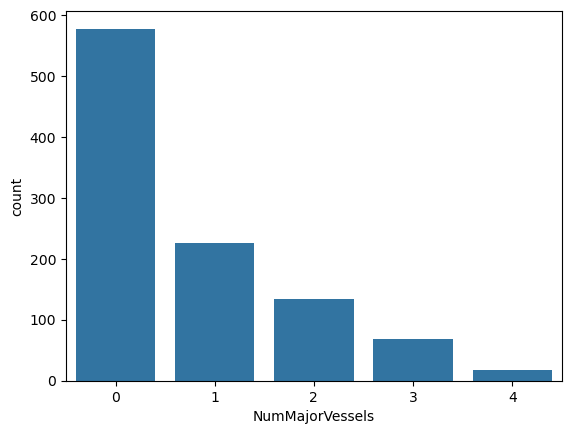

In [9]:
sns.countplot(data=df, x='NumMajorVessels')
plt.show()

In [10]:
## Checking for missing values 

df.isnull().sum()

Age                0
Sex                0
CheastPainType     0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thal               0
Target             0
dtype: int64

##### The data set has no missing values so there's no need to drop or impute new ones

In [11]:
## Now that we've had a little overview of what our data looks like,its time for some Exploratory Data Analysis

## Exploratory Data Analysis (Univariate)

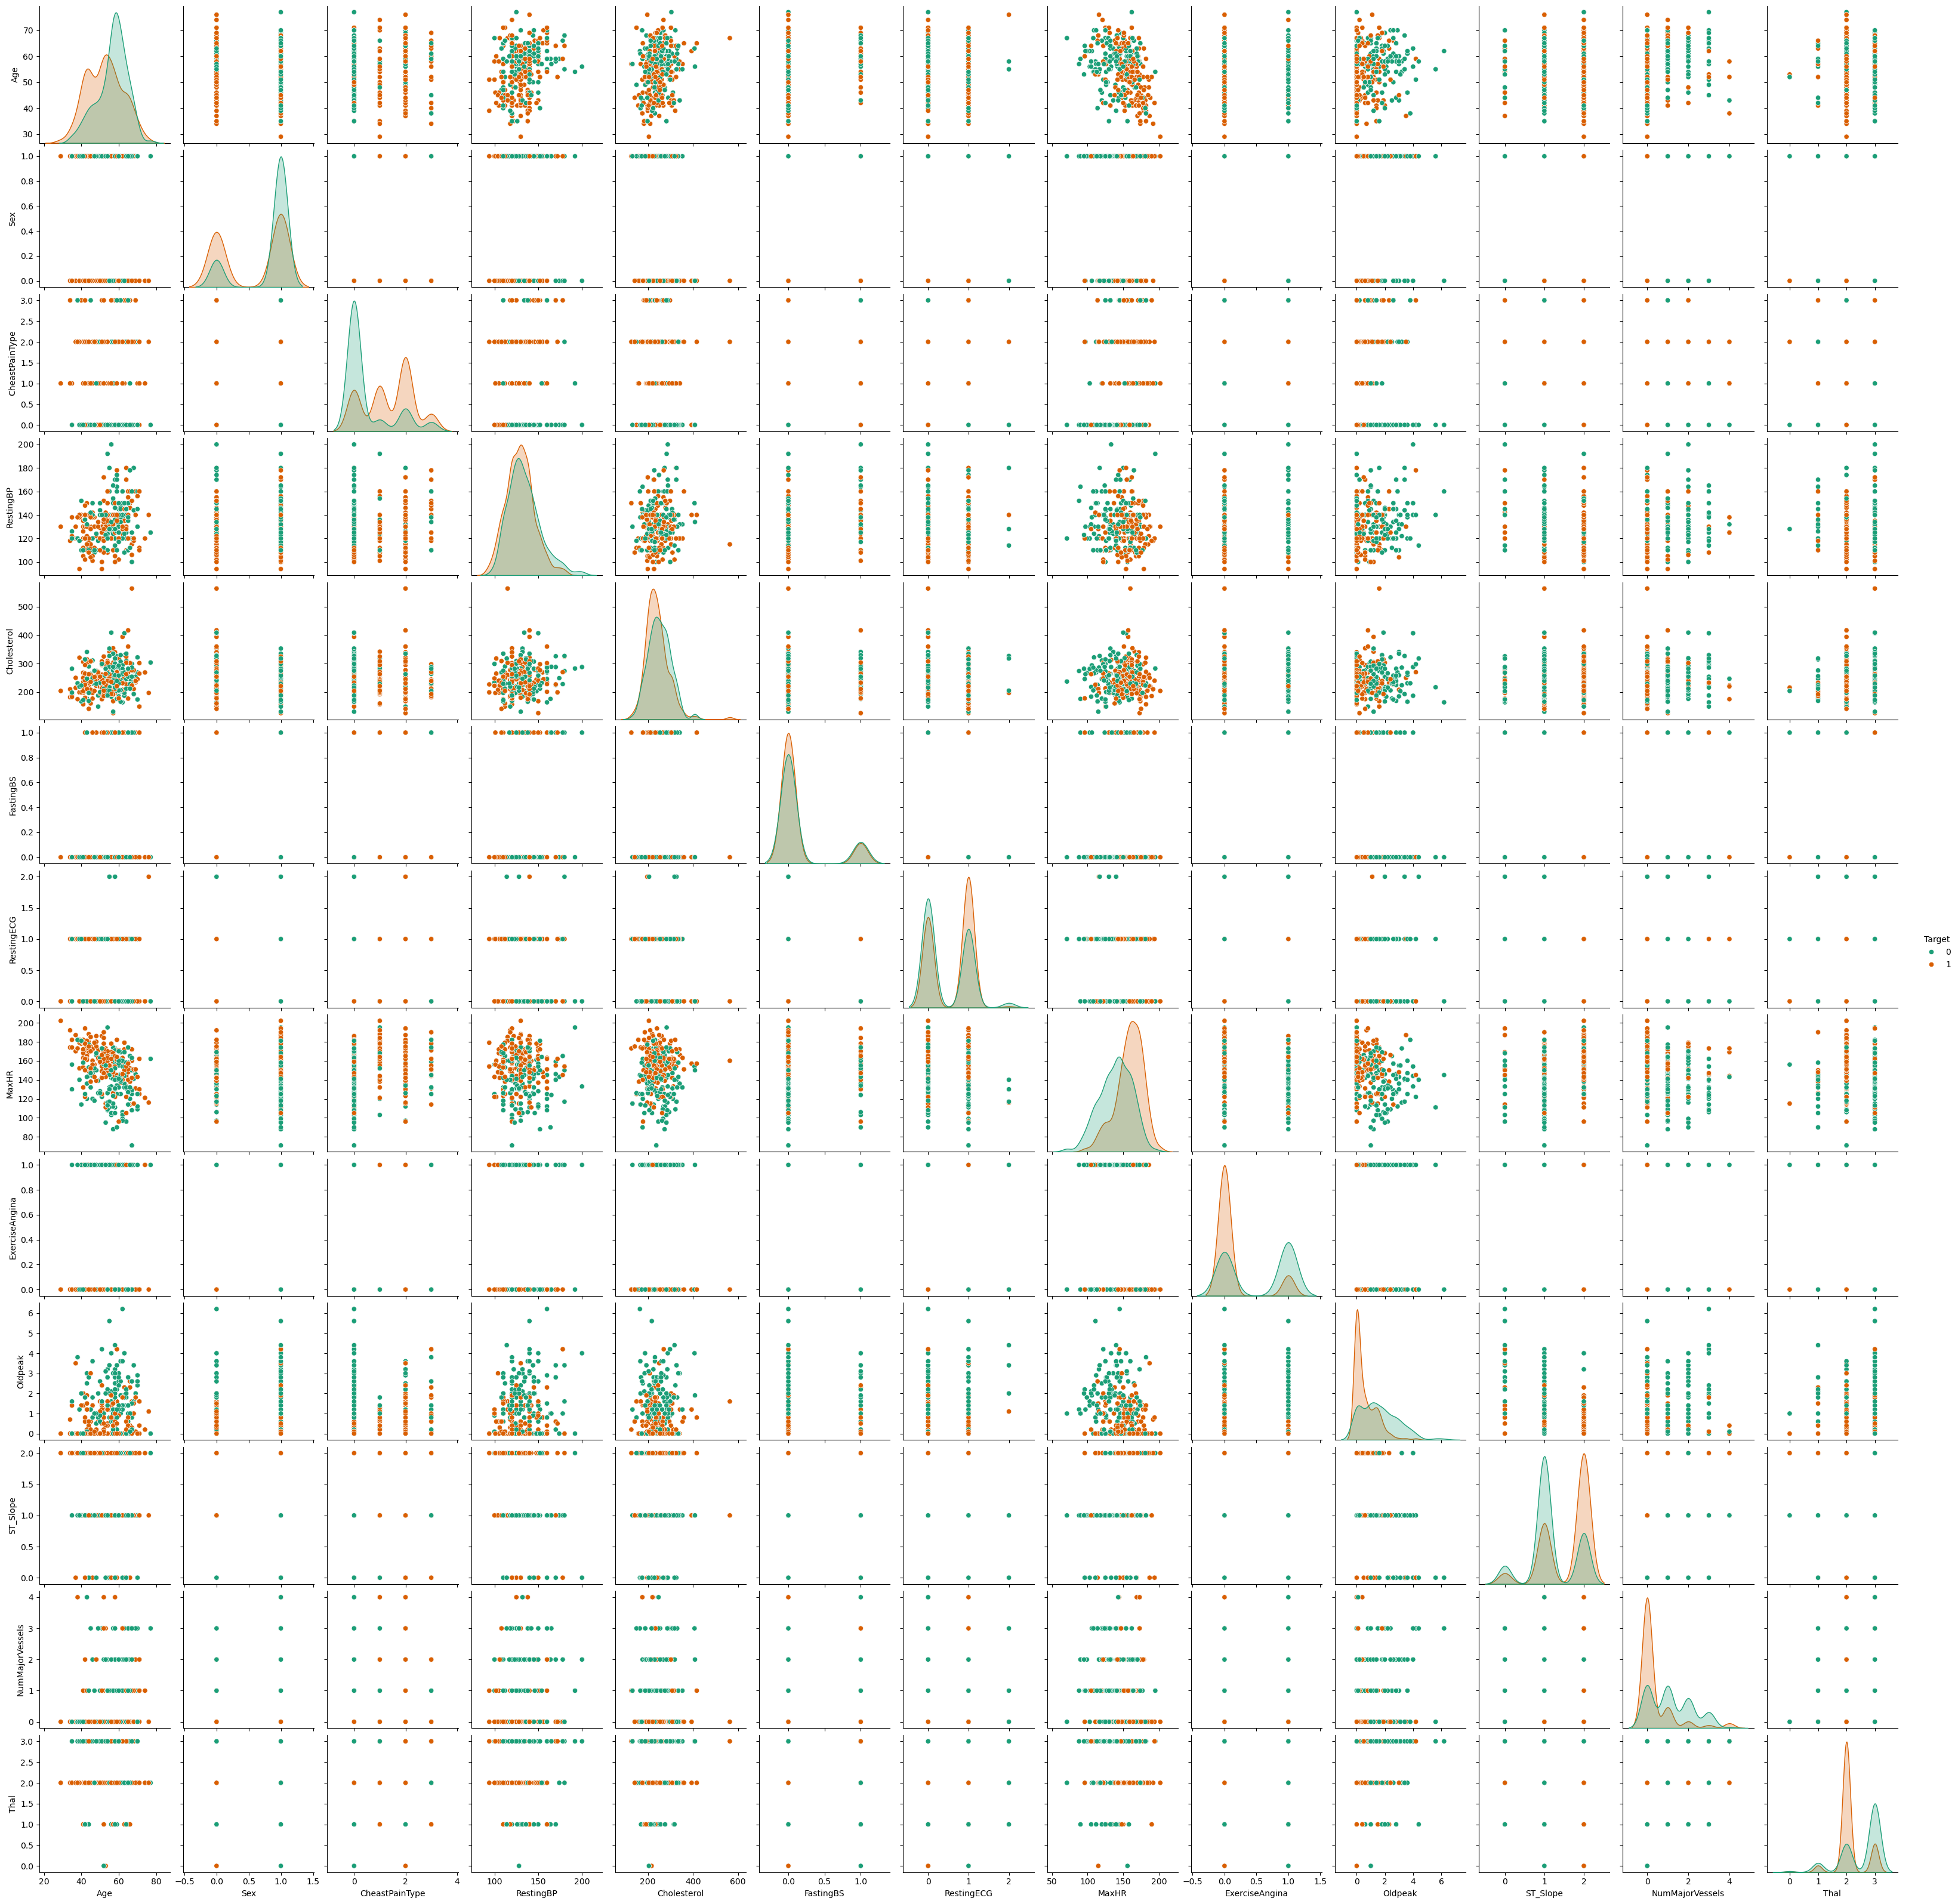

In [12]:
sns.pairplot(df, hue='Target',palette='Dark2')
plt.show()

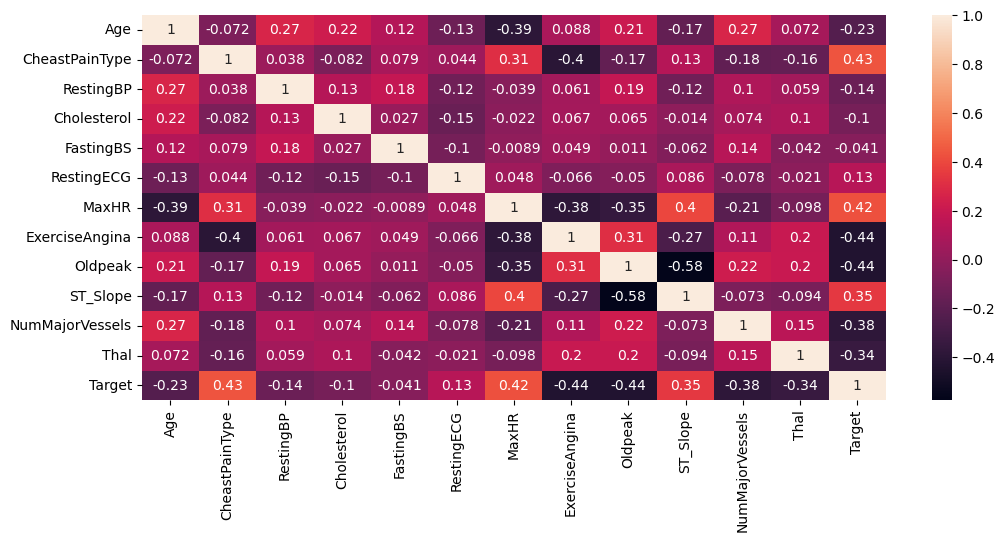

In [13]:
## Plotting a corrolation matrix
hm = df.drop('Sex', axis=1)

plt.figure(figsize=(12,5))
sns.heatmap(hm.corr(),annot=True)
plt.show()

In [14]:
## From my observation of the corralation matrix,
## There seems to not be a high amount of corralation and a lack of Multicolinearity with the highest corrolation being <=0.4.
## This will be beneficial for our model and hints that we might not need principal component Analysis

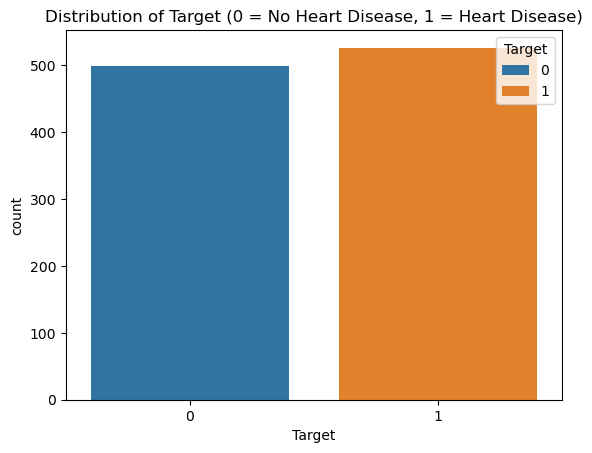

In [15]:
## Plotting a count plot to show the number of people with the disease and people without

sns.countplot(data=df, hue='Target', x='Target')
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

In [16]:
noDisease = len(df[df.Target== 0])
hasDisease = len(df[df.Target == 1])

print('Patients without heart problem: ', noDisease )
print('Patients with heart problem: ', hasDisease )


Patients without heart problem:  499
Patients with heart problem:  526


In [17]:
## We will be analyzing the features in the dataset to get a sense of the distribution first, then we will do some multivariate analysis.
## The categorical features will be compared to the TARGET in this section.

### Age

In [18]:
## Lets get a feel about the distribution of the Ages of patients in our dataset
plt.figure(figsize=(12,5))
plt.title("Age Distribution")
sns.histplot(data=df, x='Age', bins=60)
plt.show()

### Sex

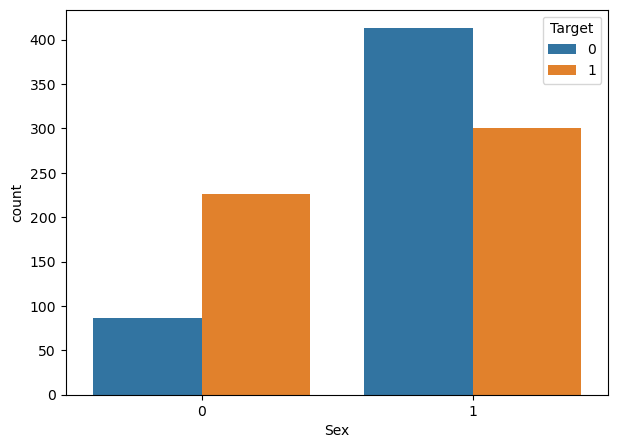

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Sex', hue='Target')
plt.show()

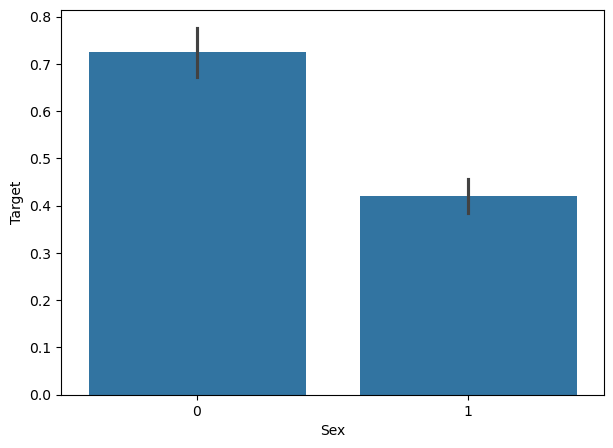

In [20]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Sex',y='Target')
plt.show()

 The first plot tells us that based on the data set, there are more men than women with heart disease. This is absolute. 
Based on the second plot, in this dataset, the proportion of women who have heart disease is higher than the proportion of men who have heart disease. This suggests that women in this dataset have a higher probability of having heart disease compared to men in this dataset.

### Chest Pain Type

Type of chest pain experienced by the individual:

0: Typical Angina (chest pain related to decreased blood flow to the heart)

1: Atypical Angina (Chest pain that’s not typical of heart-related angina but may still raise suspicion of being heart-related until ruled out.)

2: Non-Anginal Pain (Chest pain that is definitively not related to the heart and is caused by non-cardiac issues.)

3: Asymptomatic (no chest pain)


In our corrolation matrix Chest Pain Type (CPT) had the highest correlation (0.43) with the Target variable among all features, suggesting that it is a significant predictor of the Target. While correlation indicates a strong relationship, we have kept in mind that corrolation doesnt equal causation therefore further analysis might be needed to confirm its role in predicting our dependent variable 


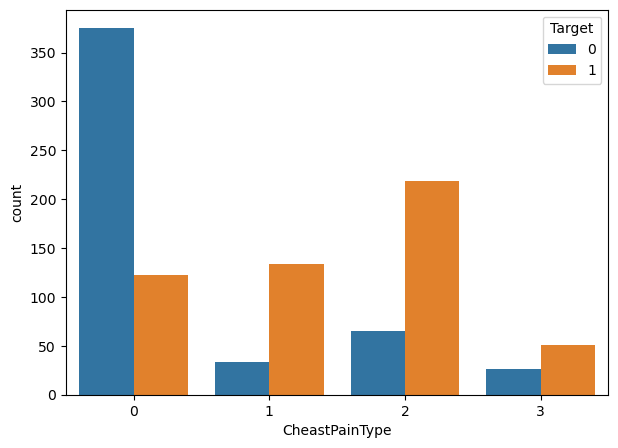

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='CheastPainType',hue='Target')
plt.show()

In [22]:

plt.figure(figsize=(7,5))
sns.barplot(data=df, x='CheastPainType', y='Target')
plt.show()


 We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems. 


### Resting Blood Pressure

**According to the World Health Organization Hypertension, also known as high or raised blood pressure, is a condition in which the blood vessels have persistently raised pressure. Blood is carried from the heart to all parts of the body in the vessels. Each time the heart beats, it pumps blood into the vessels. Blood pressure is created by the force of blood pushing 
against the walls of blood vessels (arteries) as it is pumped by the heart.
The higher the pressure, the harder the heart has to pump.**

 <img src="./HBP.png" alt="High Blood Pressure Image" width="500" />


**The BP recorded in the dataset is the Systolic blood pressure. According to this image showing different blood pressure levels, we can ask some questions
1. - What is the blood pressure level for most patients?**

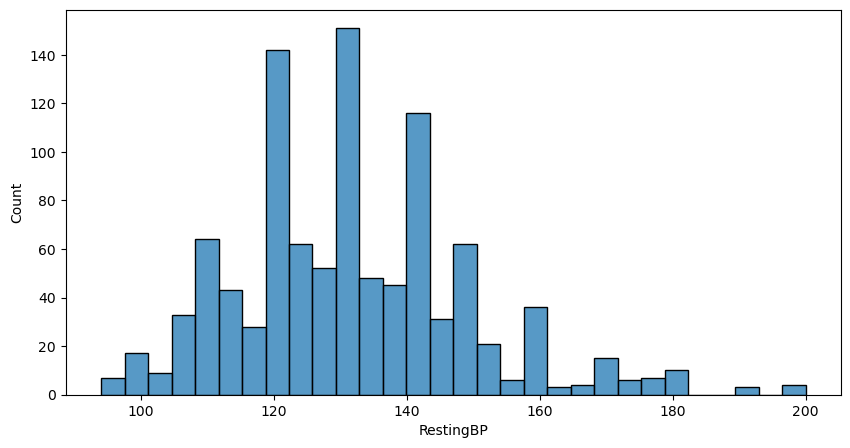

In [23]:
## Lets get a feel about the distribution of the RestingBP variable with a histogram and a Density plot 
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='RestingBP', bins=30)
plt.show()

In [24]:
sns.kdeplot(df['RestingBP'],fill=True)
plt.title('Density Plot of RestingBP')
plt.xlabel('Resting Blood Pressure')
plt.show()


In [25]:
# We plot an Empirical Cummulative Distribution Function Plot to get insights on the cummulatie percentage of our data 

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['RestingBP'])
plt.plot(ecdf.x, ecdf.y)
plt.title('ECDF of RestingBP')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Proportion')
plt.show()


Observations:
**1.  60% of the patients in our data set have Resting Blood pressure of <=140mmHg**

### Cholestrol

 <img src="./Chol.png" alt="Cholestrol level Image" width="500" />


**Cholesterol is a waxy, fat-like substance made by the liver or found in certain foods. 
If we take in more cholesterol than the body can use, the extra cholesterol can build up in the walls 
of the arteries, including those of the heart. This leads to narrowing of the arteries and can decrease the blood 
flow to the heart, brain, kidneys, and other parts of the body**

Based on the the chart above, we can try to answer some questions like: 

1. What is the cholesterol range for most patients?
2. Are there people with high levels of cholesterol in the blood ?


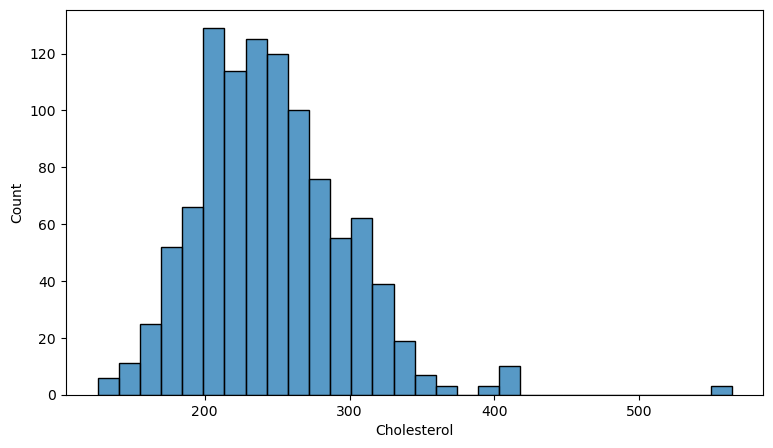

In [26]:
## Lets get a feel about the distribution of the Cholestrol variable with a histogram and a Density plot 
plt.figure(figsize=(9,5))
sns.histplot(data=df, x='Cholesterol', bins=30)
plt.show()

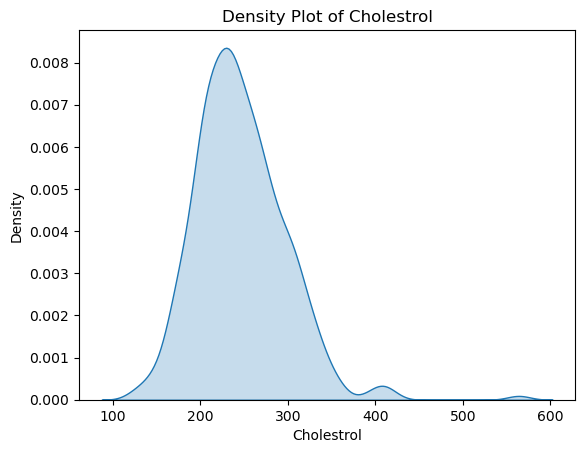

In [27]:
sns.kdeplot(df['Cholesterol'],fill=True)
plt.title('Density Plot of Cholestrol')
plt.xlabel('Cholestrol')
plt.show()


Based on the visuallizations we can answer the questions 
1. it would seem that distribution of cholestrol levels in the patients are somewhat Gausian in nature with
some outliers over 400 and outliers over 500.

3. Many of the patients actually have borderline high levels of cholestrol. Way higher than whats indicated on the chart 

### RestingECG 

The Resting ECG (Electrocardiogram) is a test that measures the electrical activity of the heart while the person is at rest. It records the heart's rhythm, the timing of electrical impulses, and the heart's overall health. In your dataset, the Resting ECG feature could be used to assess the heart's electrical activity during rest, which can provide insights into heart conditions, such as arrhythmias (irregular heartbeats) or past heart attacks.

The Resting ECG results are categorized as follows:

0. Normal: The electrical activity of the heart is within the normal range. This means no obvious issues are present with the heart's rhythm or conduction at rest.

1. ST-T wave abnormality: This indicates some abnormality in the heart's electrical activity, usually seen in conditions like ischemia (lack of blood flow) or electrolyte imbalances. ST-T abnormalities can be a sign of heart disease or arrhythmias, but they may not necessarily indicate an active problem.

2. Left ventricular hypertrophy (LVH): This suggests that the heart's left ventricle (the chamber responsible for pumping blood to the body) is thicker than normal. LVH can be a sign of high blood pressure or heart disease.

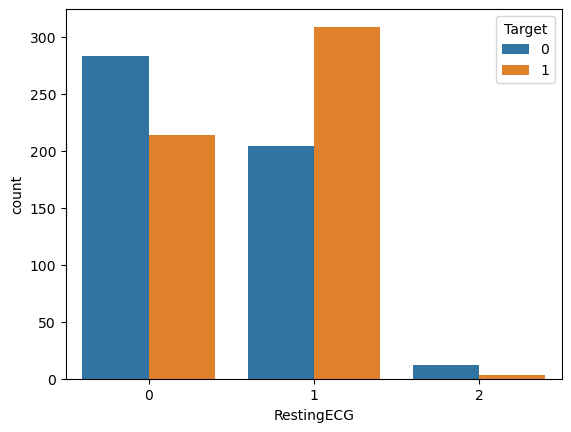

In [28]:
## Lets take a look at the distribution of ECG caetegories

sns.countplot(data=df, x="RestingECG", hue="Target")
plt.show()

Category 0 appears to have a higher count for patients without heart disease (target = 0) compared to those with heart disease (target = 1).
Category 1 has a higher count for patients with heart disease, indicating that more individuals with heart disease have ST-T wave abnormalities.
Category 2 seems to have very few cases, which could suggest that the incidence of Left Ventricular Hypertrophy (LVH) is less common in this dataset.

### MaxHR     

Maximum heart rate
Heart rate is a predictor of cardiovascular and all-cause mortality in the general population and in patients with cardiovascular disease. Increased resting heart rate multiplies risk and interferes at all stages of the cardiovascular disease.

<img src='heartrate.png'/>

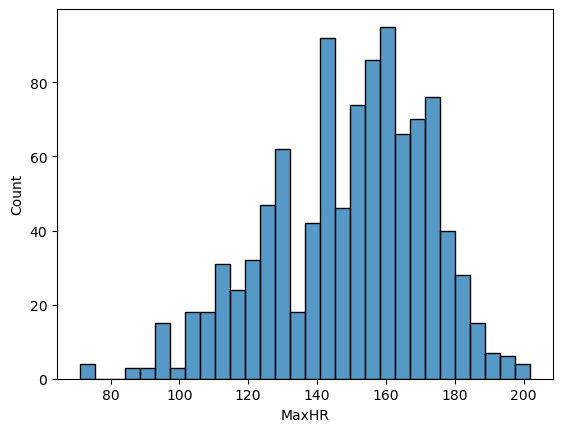

In [29]:
sns.histplot(data=df, x='MaxHR', bins=30)
plt.show()

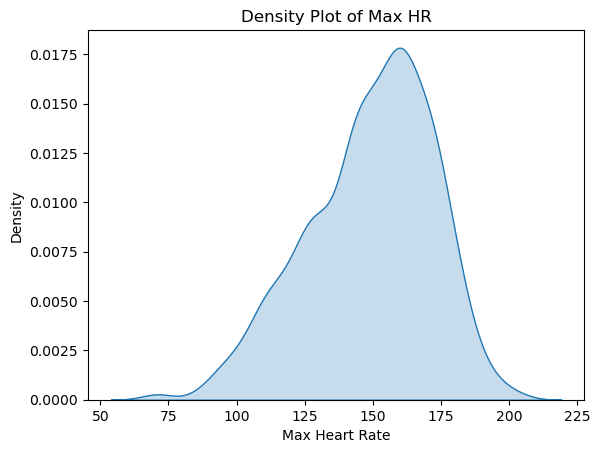

In [30]:
sns.kdeplot(df['MaxHR'],fill=True)
plt.title('Density Plot of Max HR')
plt.xlabel('Max Heart Rate')
plt.show()

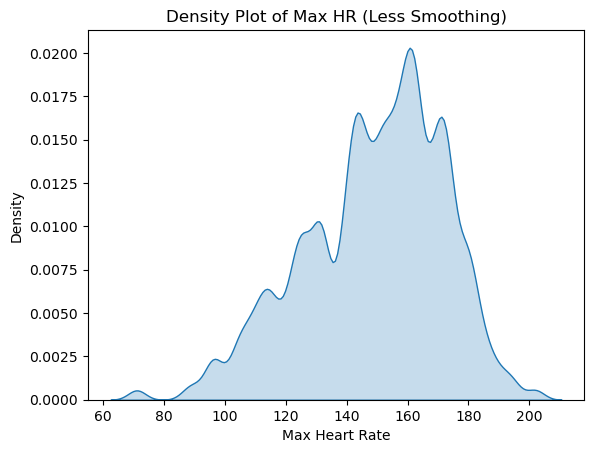

In [31]:
sns.kdeplot(df['MaxHR'], fill=True, bw_adjust=0.5)
plt.title('Density Plot of Max HR (Less Smoothing)')
plt.xlabel('Max Heart Rate')
plt.show()

### ST_Slope   

ST_Slope refers to how the ST segment on an electrocardiogram (ECG) changes during exercise, typically during a stress test. 

0: Upsloping (normal): In a healthy heart, the ST segment should gradually slope upwards during exercise. This is considered a normal response.

1: Flat (indicates possible heart disease): If the ST segment remains flat (horizontal) during exercise, it can suggest that the heart muscle isn't getting enough blood flow (ischemia). This could be a sign of coronary artery disease.

2: Downsloping (indicates more severe heart disease): If the ST segment slopes downwards during exercise, it's a stronger indication of significant ischemia and a higher likelihood of underlying heart disease.


Lets take a look at the ST_slope in the data

In [32]:

sns.countplot(data=df, x='ST_Slope')

plt.show()

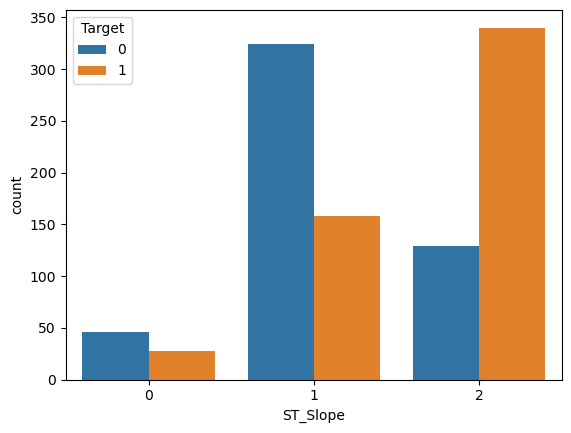

In [33]:
sns.countplot(data=df,x="ST_Slope", hue="Target")
plt.show()

It would appear that there are few cases of a normal ST segment in our dataset compared to the abnormal cases. There are more cases of heart disease in patients who have a doenward slopping ST Segment compared to those who dont have. 

### ExerciseAngina  

Angina is chest pain or discomfort that occurs when the heart muscle doesn't get enough oxygen-rich blood.
Exercise-induced angina means this pain is brought on by physical activity that increases the heart's workload.
Lets take a look at a barplot to understand the proportionality.

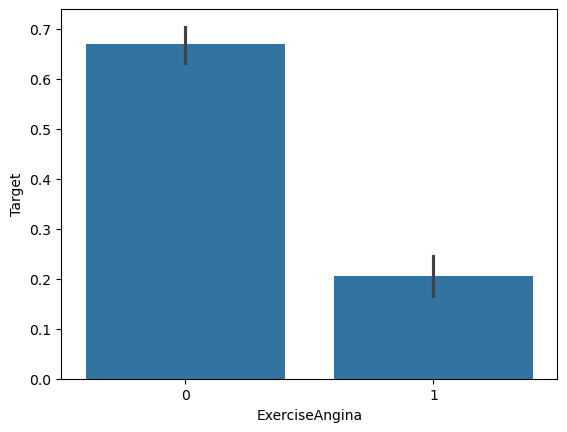

In [34]:
sns.barplot(data=df, x="ExerciseAngina", y="Target")
plt.show()

A higher bar for ExerciseAngina = 0 means that a larger proportion of people without exercise-induced angina have heart disease. Conversely, the lower bar for ExerciseAngina = 1 means that a smaller proportion of people with exercise-induced angina have heart disease.  The plot highlights that while exercise-induced angina is a sign of heart disease, it might not be the most significant or only indicator of heart disease within this dataset.

###  NumMajorVessels 

 Number of major blood vessels (0–4) colored by fluoroscopy during imaging tests refers to a diagnostic measurement used to assess the extent of coronary artery disease (CAD). 

Coronary angiography: This is an invasive imaging test where a catheter (thin tube) is inserted into a blood vessel (usually in the groin or arm) and guided to the coronary arteries.
During angiography, the dye highlights the inside of the coronary arteries. This allows doctors to see any blockages or narrowing in the vessels. The "number of major blood vessels colored" refers to how many of the main coronary arteries show significant narrowing or blockage. 

In [35]:
df["NumMajorVessels"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

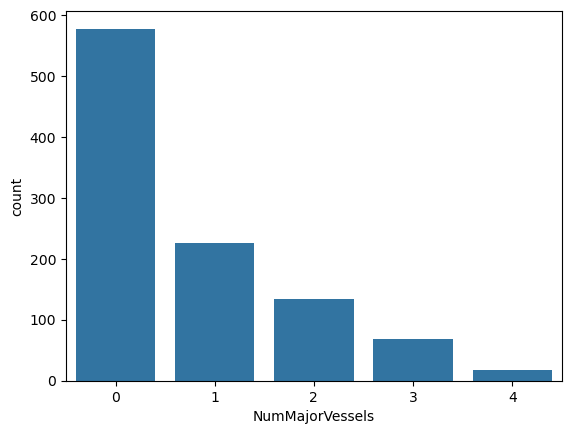

In [36]:
sns.countplot(data=df, x='NumMajorVessels')
plt.show()

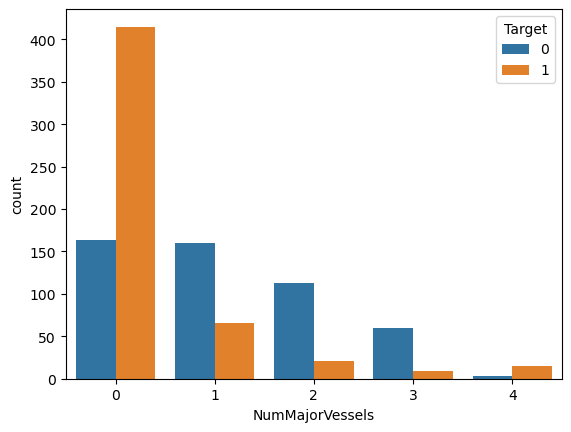

In [37]:
sns.countplot(data=df, x='NumMajorVessels', hue="Target")
plt.show()

### Thal

The Thallium stress test is a diagnostic imaging test used to assess blood flow to the heart, particularly during physical activity (stress). It uses a small amount of radioactive thallium, which is injected into the bloodstream. The test monitors how well the heart muscles are receiving blood and oxygen during stress and at rest.

Here's what the labels mean:

0: Normal – No abnormalities detected in blood flow; the heart muscle is healthy, and there's no evidence of ischemia (reduced blood flow).

1: Fixed defect (permanent damage) – A part of the heart muscle has permanent damage due to a previous heart attack or other irreversible condition. This area does not receive sufficient blood flow, even at rest.

2: Reversible defect (temporary damage) – During the stress portion of the test, some areas of the heart show reduced blood flow, but these areas recover at rest. This could indicate that there is a temporary blockage or narrowing in the coronary arteries.

3: Severe defect (severe or extensive damage) – This likely indicates a more severe and widespread defect, where large areas of the heart muscle are not receiving enough blood, even under stress. This could indicate extensive coronary artery disease or other severe cardiac conditions

In [38]:
sns.barplot(data=df, x="Thal", y="Target")
plt.show()

### FastingBS

A fasting blood sugar value is used to assess glucose levels and detect conditions like diabetes or prediabetes and it's measured in mg/dL.
High fasting blood sugar (FBS > 120 mg/dL) could indicate diabetes, which is a significant risk factor for heart disease.
According to WHO people with diabetes are more likely to develop atherosclerosis, high blood pressure, and other conditions that can lead to heart disease.

**1: FBS > 120 mg/dL (high fasting blood sugar).
0: FBS ≤ 120 mg/dL (normal fasting blood sugar).**

In [39]:
sns.countplot(data=df, x="FastingBS")
plt.show()

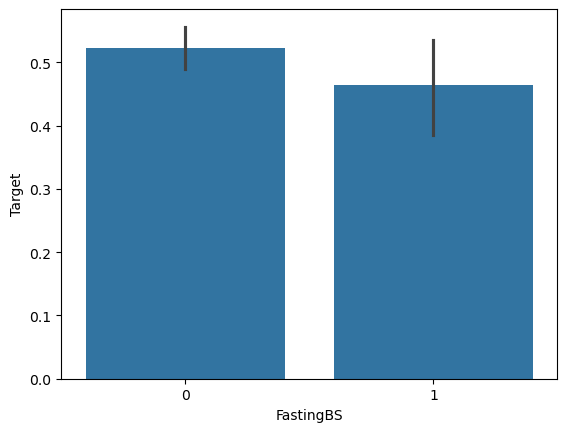

In [40]:
sns.barplot(data=df, x="FastingBS", y="Target")
plt.show()

From the analysis it seems that People with a higher fasting sugar level actually have a lower probability of having heart disease than those with high blood sugar levels this is a bit weird but doing a value count allowed us to understand that this result was caused by a large disparity in our dataset  as there are way more people with a low BS level than those without

In [41]:
df['FastingBS'].value_counts()

FastingBS
0    872
1    153
Name: count, dtype: int64

## Exploratory Data Analysis (Bivariate)

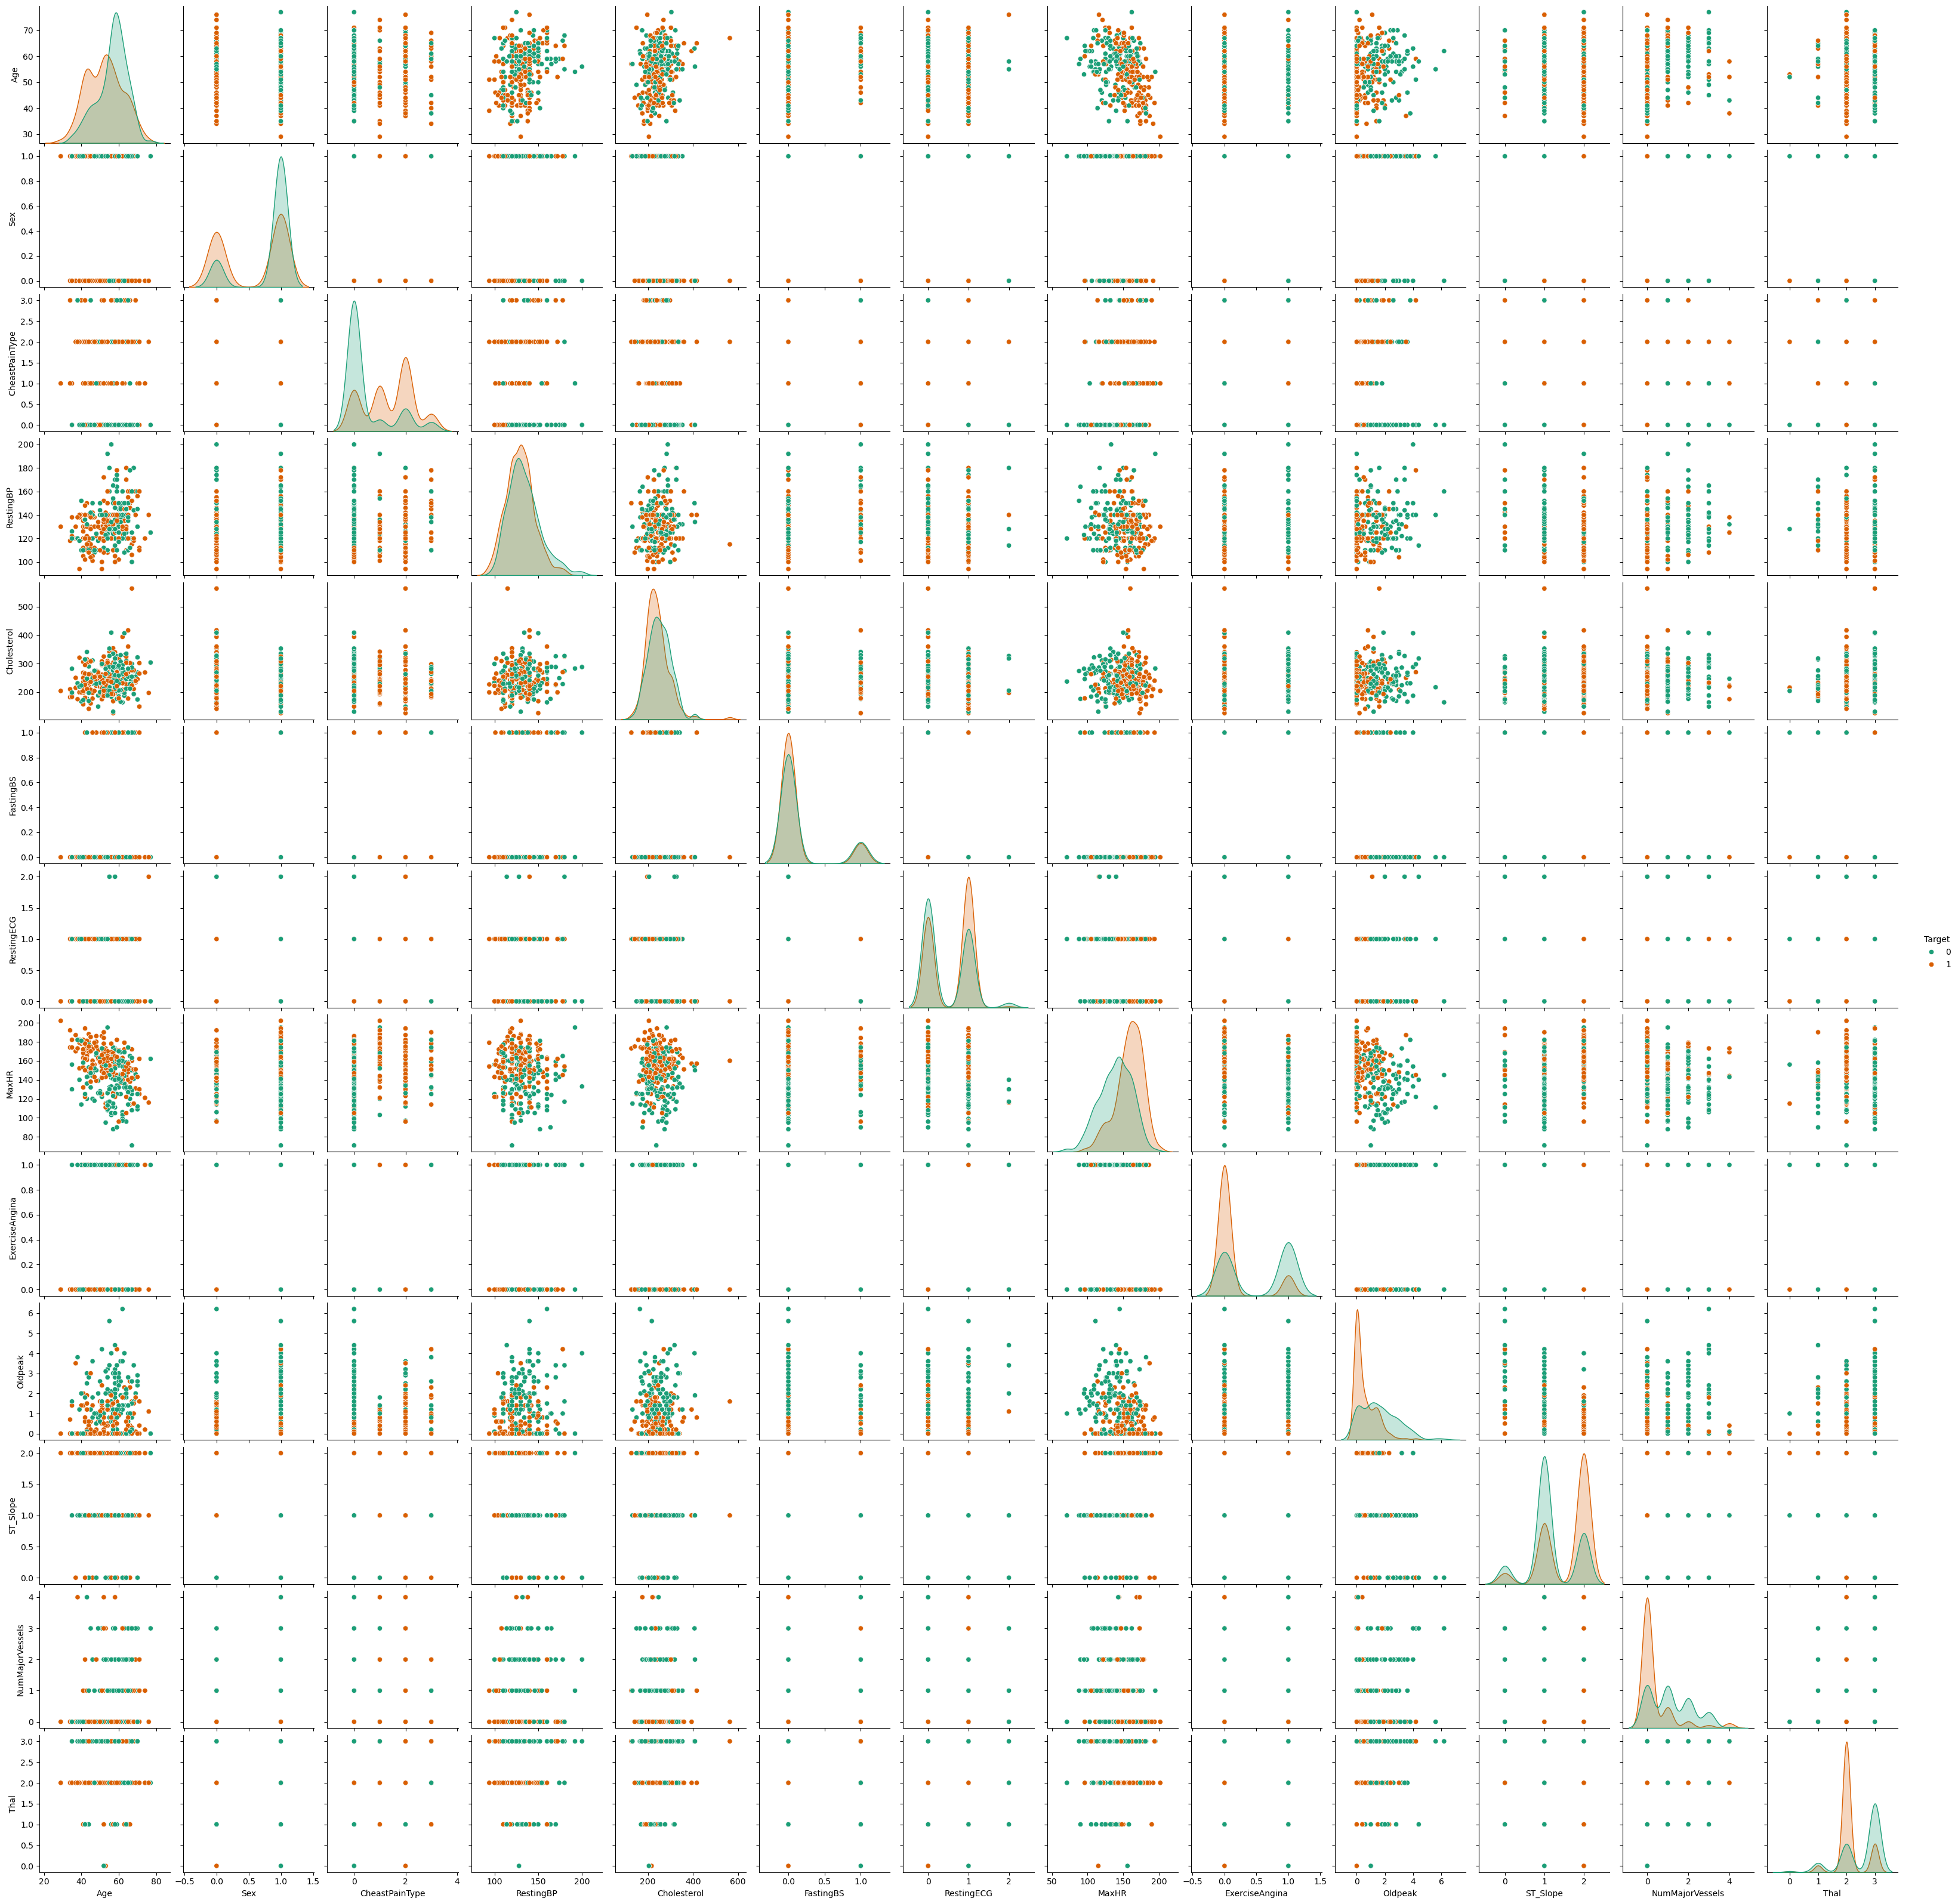

In [42]:
sns.pairplot(df, hue='Target',palette='Dark2')
plt.show()

In the previously plotted pairplot we were able to identify some relationships between our features and we will explore those in addition to any hunches we may have. 

##  CONTINUOUS VS CATEGORICAL (TARGET)

### Old Peak Vs. Target

In [43]:
# Create the boxplot
ax = sns.boxplot(x='Target', y='Oldpeak', data=df, color='pink') 

# Adjust y-axis limits
ax.set_ylim(-1.5, 7)  

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

The median 'Oldpeak' for Target 0 is lower than that for Target 1. This suggests that, on average, individuals without heart disease tend to have lower 'Oldpeak' values. The interquartile range (IQR, the box's height) for Target 0 is wider, indicating more variability in 'Oldpeak' values within this group. We will further look at this by performing a  **Mann-Whitney U test** which is used to show if there is a statistically significant difference between the medians of two independent groups.

In [44]:
from scipy.stats import mannwhitneyu

group0 = df[df['Target'] == 0]['Oldpeak']
group1 = df[df['Target'] == 1]['Oldpeak']

statistic, p_value = mannwhitneyu(group0, group1)

print(f"Mann-Whitney U statistic: {statistic} \n")
print(f"P-value: {p_value}\n")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("The difference in Oldpeak between the two groups is statistically significant.")
else:
    print("There is no statistically significant difference in Oldpeak between the two groups.")

Mann-Whitney U statistic: 196450.5 

P-value: 1.4469728736988233e-44

The difference in Oldpeak between the two groups is statistically significant.


**Based on this very low p value we will reject the null hypothesis and conclude that the difference in their medians is not due to chance.**

### MaxHR vs Target

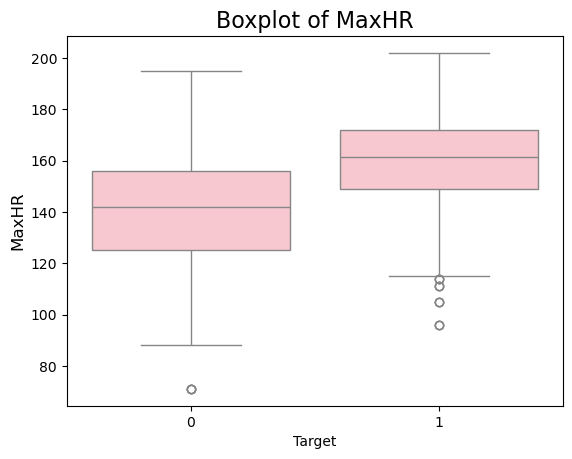

In [45]:
sns.boxplot(data=df, y='MaxHR', x='Target', color='pink')
plt.title('Boxplot of MaxHR', fontsize=16)
plt.ylabel('MaxHR', fontsize=12)
plt.show()

Based on the analysis the following conclusions can be made: The distributions of MaxHR differ noticeably between the two 'Target' groups (0 and 1). The median MaxHR for Target 0 is lower than the median MaxHR for Target 1. It appears the median for Target 0 is around 142, while the median for Target 1 is closer to 160. The IQR (the box's height, representing the middle 50% of the data) is slightly larger for Target 1 than for Target 0. It looks like the IQR for Target 0 spans from about 130 to 155, while for Target 1 it's roughly 150 to 170. This suggests slightly more variability in MaxHR for Target 1. There are a few potential outliers below 80 for Target 0, indicating unusually low MaxHR values for those individuals.
There are no apparent low outliers for Target 1. 



We will conduct further invwestigations and also stratify the plot with age to get a better sense of this relationship.

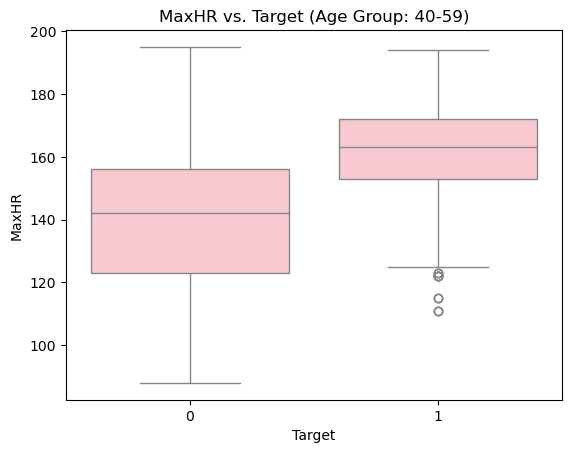

In [46]:
bins = [20, 40, 60, 80]
labels = ['20-39', '40-59', '60-79']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create boxplots for each age group
for age_group in labels:
    subset = df[df['AgeGroup'] == age_group]
    sns.boxplot(x='Target', y='MaxHR', data=subset, color="pink")
    plt.title(f'MaxHR vs. Target (Age Group: {age_group})')
    plt.show()

20-39: MaxHR values are generally the highest in this age group.
The difference in median MaxHR between Target 0 and Target 1 is not very pronounced.
There is a noticeable overlap in the distributions of MaxHR for the two target groups.

40-59: The overall range of MaxHR values is lower compared to the 20-39 group.
The median MaxHR for Target 1 appears slightly higher than for Target 0.
There's still some overlap in the distributions, but the difference in medians is more visible than in the younger group.

60-79: MaxHR values are the lowest overall in this age group.
The difference in median MaxHR between Target 0 and Target 1 is less clear compared to the other age groups.

The relationship between MaxHR and Target seems to vary across age groups. This suggests that the impact of heart disease  on MaxHR might be modulated by age.

### CHOLESTROL vs. TARGET

In [47]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, y='Cholesterol', x="Target")
plt.show()

The overall distributions of cholesterol levels for both Target groups (0 and 1) appear somewhat similar, but there are some notable differences. The median cholesterol level for Target 1 seems slightly higher than the median cholesterol level for Target 0 but it doesnt seem dramatically large. The IQR  is roughly similar for both Target groups. This suggests comparable variability in cholesterol levels within the middle ranges for both groups. There are several high outliers in the Target 1 group. I believe that this is a crucial and key observation. These outliers indicate unusually high cholesterol levels among some individuals in the group with likely heart disease.  **The presence of high cholesterol outliers in the Target 1 group suggests that high cholesterol may be a contributing factor to heart disease**

### AGE vs. TARGET 

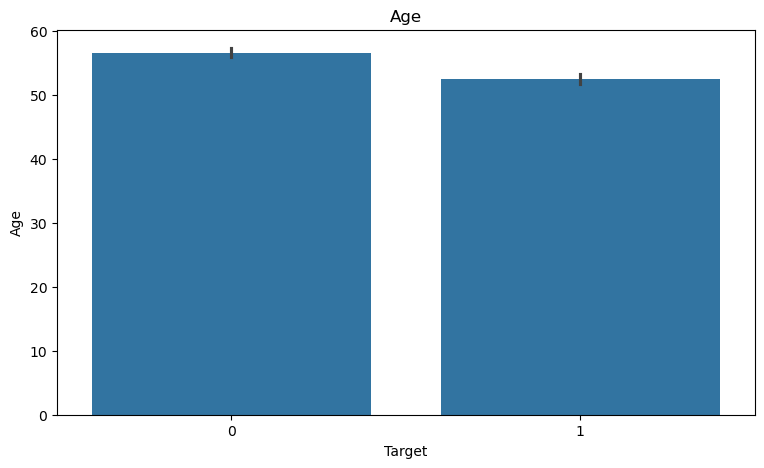

In [48]:
plt.figure(figsize=(9,5))
plt.title("Age")
sns.barplot(data=df, y='Age',x='Target')
plt.show()

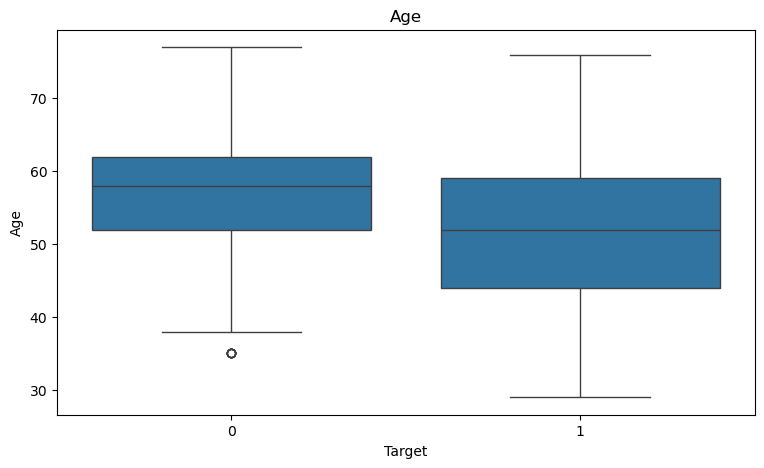

In [49]:
plt.figure(figsize=(9,5))
plt.title("Age")
sns.boxplot(data=df, y='Age',x='Target')
plt.show()

 The bar plot indicates that the average ages of the two Target groups are very similar, suggesting that age alone is not a strong predictor for the 'Target' variable. 

The boxplot indicates that the age distributions of the two Target groups are very similar with not a large amount of difference in them. We can conclude that age is a crucial feature inpredicting the target variable.

### RestingBP Vs. Target

In [50]:
sns.barplot(data=df, x='Target', y='RestingBP')
plt.show()

The bar plot suggests that people with heart disease (Target = 1) have a slightly higher mean resting blood pressure (approximately 130) compared to people without heart disease (Target = 0, approximately 125). However, the difference appears small, and the overlap in the error bars indicates that the difference might not be statistically significant.

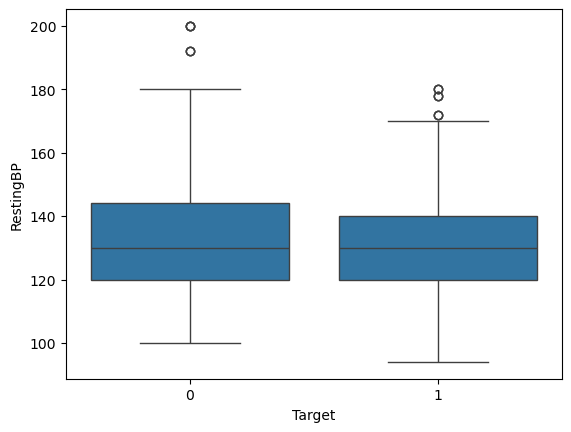

In [51]:
sns.boxplot(data=df, x='Target', y='RestingBP')
plt.show()

Concerning the first class (Target = 0): The median resting blood pressure is around 130.50% of the data (the IQR) falls roughly between 125 and 145.
The whiskers extend to approximately 100 on the lower end and 180 on the higher end, representing the range of data within 1.5 times the IQR.
There are a few outliers above 180.

For the second class (Target = 1): The median resting blood pressure is slightly lower than for Target=0, around 125.The IQR is smaller, roughly between 120 and 130. The whiskers extend to approximately 95 on the lower end and 170 on the higher end. There are a few outliers above 170.

##  CONTINUOUS vs. CATEGORICAL

### ChestPainType vs. Resting BP

In [52]:
sns.boxplot(data=df, x="CheastPainType", y="RestingBP")
plt.show()




ChestPainType 0: Has the highest median RestingBP among the four groups.

ChestPainType 1: Has a slightly lower median RestingBP compared to type 0.

ChestPainType 2: Has a median RestingBP similar to type 1.

ChestPainType 3: Has the lowest median RestingBP.

The interquartile ranges (IQRs, represented by the boxes) show differences in variability:
Types 0 and 2 have the largest IQRs, showing that theres more variability in RestingBP within those groups.
Types 1 and 3 have smaller IQRs, suggesting less variability.


The observed differences in RestingBP distributions suggest a possible relationship between the type of chest pain and resting blood pressure.

### Sex vs. MaxHR

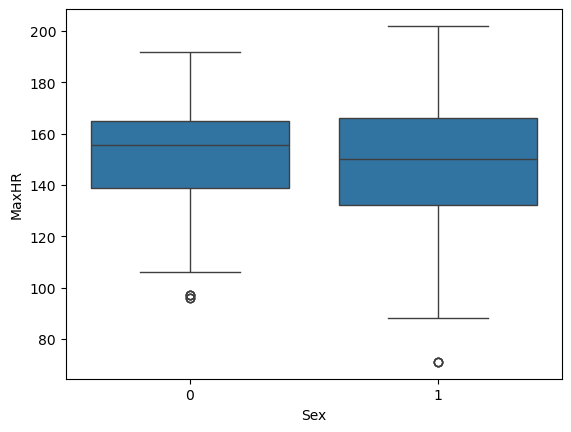

In [53]:
sns.boxplot(data=df,x="Sex", y="MaxHR")
plt.show()

The boxplot shows the distribution of MaxHR (Maximum Heart Rate) for two groups categorized by Sex (0 and 1). While the plot suggests a slightly higher median MaxHR for Sex 0  it's essential to interpret this in the context of the known sex imbalance in the dataset.

Earlier in the univariate analysis it was discovered that there were more  women in the target feature and a lesser amount of female sample size. the fact that there are significantly more females with higher heart rates could be skewing the overall distribution for Sex 0. The higher median might primarily reflect the higher proportion of females in that group rather than a true biological difference in MaxHR between sexes.

While the IQRs and overall spread appear similar, the presence of outliers in both groups warrants attention. The single low outlier in the Sex 0 group could be a genuine case or an error, and the same applies to the outlier in the Sex 1 group.

### Sex vs. Resting BP

C:\Users\PROGRESSIVE\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


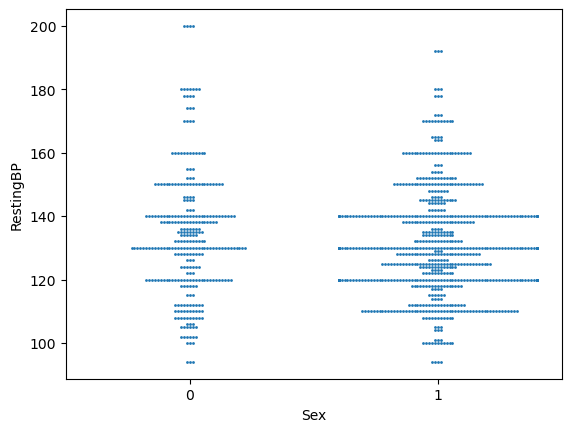

<Figure size 1000x600 with 0 Axes>

In [54]:
sns.swarmplot(data=df, x="Sex", y="RestingBP", size=2,)
plt.figure(figsize=(10, 6))
plt.show()

Inference based on the Swarm Plot:

Women (Sex = 0): The spread of resting blood pressure (RestingBP) is broad, and many women have higher blood pressure values compared to men.
It appears there are more instances of women with high blood pressure (values exceeding 140-160).

Men (Sex = 1): The range of RestingBP is slightly tighter, with fewer extremely high values compared to women. 

We will try another type o plot to see if we can infer more about this relationship

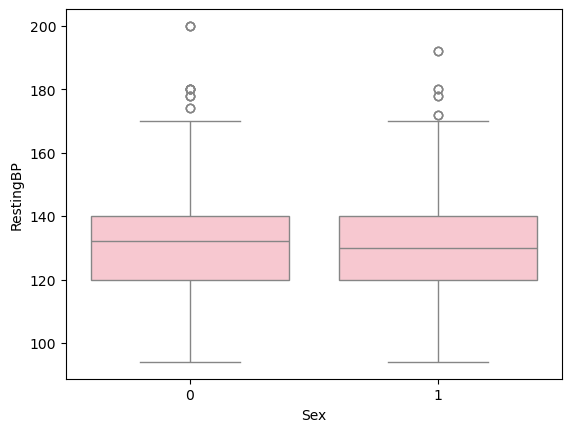

In [55]:
sns.boxplot(data=df, x="Sex", y="RestingBP", color="Pink")
plt.show()

From the box plot we can see that
Median RestingBP:The median RestingBP (middle line in the box) for women and men appears similar, likely around 130.

Interquartile Range (IQR): Both sexes have a similar spread in the interquartile range, indicating that the middle 50% of the data for both sexes is quite comparable.

Whiskers: The whiskers for both groups extend to similar ranges, showing that most RestingBP values are consistent across both sexes.

Outliers:Both sexes have outliers, but there seem to be slightly more extreme high blood pressure values for women (e.g., RestingBP exceeding 180). This is likely what caused the first inference to conclude that women have a higher bp than men


Both women (Sex = 0) and men (Sex = 1) have very similar distributions of RestingBP. The medians and interquartile ranges (IQRs) are nearly identical, indicating no significant difference in typical blood pressure levels between the two sexes. Women tend to have more extreme high blood pressure values (outliers) compared to men. However, these are exceptions and not representative of the general population. There doesn’t appear to be a strong relationship between sex and RestingBP overall. The distributions are largely overlapping, suggesting that sex alone is probably not be a significant factor in determining RestingBP. At least not in this dataset.

## CONTINUOUS vs. CONTINUOUS

### Age vs MaxHR

In [56]:
df_grouped = df.groupby('Age')['MaxHR'].mean().reset_index()
sns.lineplot(data=df_grouped, x='Age', y='MaxHR', )
plt.show()


MaxHR (Maximum Heart Rate) generally decreases as Age increases. This is consistent with the understanding that maximum heart rate tends to decline with age. However, there is substantial variance in MaxHR within each age group, indicating that other factors beyond age play a significant role in determining an individual's maximum heart rate.

### Age vs Cholestrol

In [57]:
sns.scatterplot(data=df, x="Age", y='Cholesterol')
plt.show()

There appears to be a weak positive correlation between age and cholesterol. As age increases, cholesterol levels tend to increase slightly, but the relationship is not very strong. The data points are really scattered.  At younger ages (30-40), cholesterol levels tend to be lower but also show some variability.
As age increases, the range of cholesterol values widens, with some individuals having significantly higher cholesterol levels.
A large portion of the data points are clustered in the middle range of both age (around 50-65) and cholesterol (around 200-300).



### Age vs. RestingBP

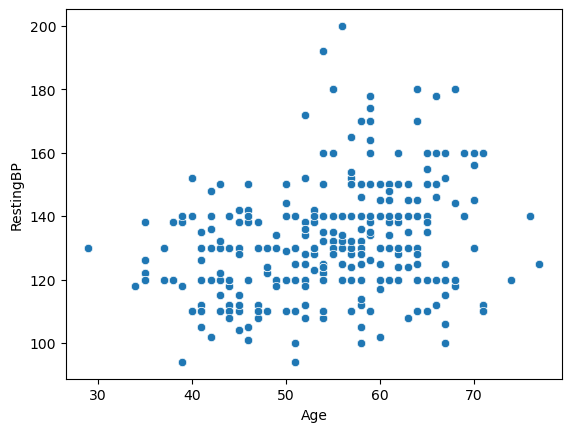

In [58]:
sns.scatterplot(data=df, x='Age', y='RestingBP', )
plt.show()


### RestingBP vs. MaxHR

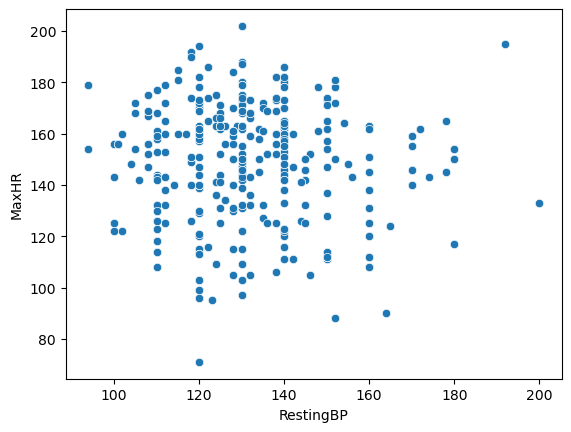

In [59]:
sns.scatterplot(data=df, x="RestingBP", y="MaxHR")
plt.show()

 A significant portion of the data points are clustered in the middle range of both RestingBP (around 120-140) and MaxHR (around 140-180).
  There are a few instances where individuals have relatively high RestingBP (above 160) and low MaxHR (below 120).
  The overall correlation is weak. This suggests that while there's a general tendency for MaxHR to decrease with increasing RestingBP, other factors are likely playing a significant role in determining both variables. In conclusion, the scatter plot suggests a weak negative correlation between MaxHR and RestingBP

## Building the Model

### Training and Test Split

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

In [61]:
X = df.drop(['Target','AgeGroup'], axis=1)

y = df['Target']


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
lr = LogisticRegression(max_iter=1000)

In [64]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [65]:
uno = lr.predict(X_test)

In [66]:
print(classification_report(y_test, uno))

print(accuracy_score(y_test, uno))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       148
           1       0.78      0.93      0.85       160

    accuracy                           0.83       308
   macro avg       0.84      0.82      0.82       308
weighted avg       0.84      0.83      0.83       308

0.827922077922078


In [67]:
# Define the models

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=500)
}

In [68]:
# Define the metrics we want to evaluate for each model
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [69]:
results = []

# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    start_time = time() # Start the timer
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time() # End the timer

    # Compute the average of each metric across the folds
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    elapsed_time = end_time - start_time # Time taken to run the model


    # Store the results in the list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc,
        'Time (s)': elapsed_time
    })

   
    print(f"{name} completed in {elapsed_time:4f} seconds.")

Logistic Regression completed in 0.440286 seconds.
Random Forest completed in 2.265820 seconds.
SVM completed in 1.421478 seconds.
Decision Tree completed in 0.200106 seconds.
KNN completed in 0.344037 seconds.
Naive Bayes completed in 0.226138 seconds.
Gradient Boosting completed in 2.290848 seconds.
AdaBoost completed in 1.570590 seconds.
Bagging Classifier completed in 0.600091 seconds.
MLP Classifier completed in 3.504323 seconds.


In [70]:
# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

In [71]:
results_df 

Model  Accuracy  Precision    Recall  F1-score       AUC  \
0  Logistic Regression  0.839637   0.804158  0.907220  0.852292  0.920361   
1        Random Forest  0.981876   0.983743  0.980896  0.982256  0.997827   
2                  SVM  0.708411   0.689051  0.781377  0.731448  0.760321   
3        Decision Tree  0.977681   0.978622  0.978156  0.978246  0.977670   
4                  KNN  0.707080   0.715841  0.715994  0.714177  0.808183   
5          Naive Bayes  0.832653   0.806340  0.885339  0.843872  0.905791   
6    Gradient Boosting  0.960965   0.964584  0.959052  0.961617  0.985833   
7             AdaBoost  0.885587   0.885794  0.893410  0.889027  0.958831   
8   Bagging Classifier  0.966550   0.970031  0.964606  0.967119  0.990785   
9       MLP Classifier  0.828467   0.792565  0.904480  0.843589  0.915466   

   Time (s)  
0  0.440286  
1  2.265820  
2  1.421478  
3  0.200106  
4  0.344037  
5  0.226138  
6  2.290848  
7  1.570590  
8  0.600091  
9  3.504323

In [72]:

results_df = results_df.sort_values(by="Recall", ascending=False)

In [73]:
results_df

Model  Accuracy  Precision    Recall  F1-score       AUC  \
1        Random Forest  0.981876   0.983743  0.980896  0.982256  0.997827   
3        Decision Tree  0.977681   0.978622  0.978156  0.978246  0.977670   
8   Bagging Classifier  0.966550   0.970031  0.964606  0.967119  0.990785   
6    Gradient Boosting  0.960965   0.964584  0.959052  0.961617  0.985833   
0  Logistic Regression  0.839637   0.804158  0.907220  0.852292  0.920361   
9       MLP Classifier  0.828467   0.792565  0.904480  0.843589  0.915466   
7             AdaBoost  0.885587   0.885794  0.893410  0.889027  0.958831   
5          Naive Bayes  0.832653   0.806340  0.885339  0.843872  0.905791   
2                  SVM  0.708411   0.689051  0.781377  0.731448  0.760321   
4                  KNN  0.707080   0.715841  0.715994  0.714177  0.808183   

   Time (s)  
1  2.265820  
3  0.200106  
8  0.600091  
6  2.290848  
0  0.440286  
9  3.504323  
7  1.570590  
5  0.226138  
2  1.421478  
4  0.344037

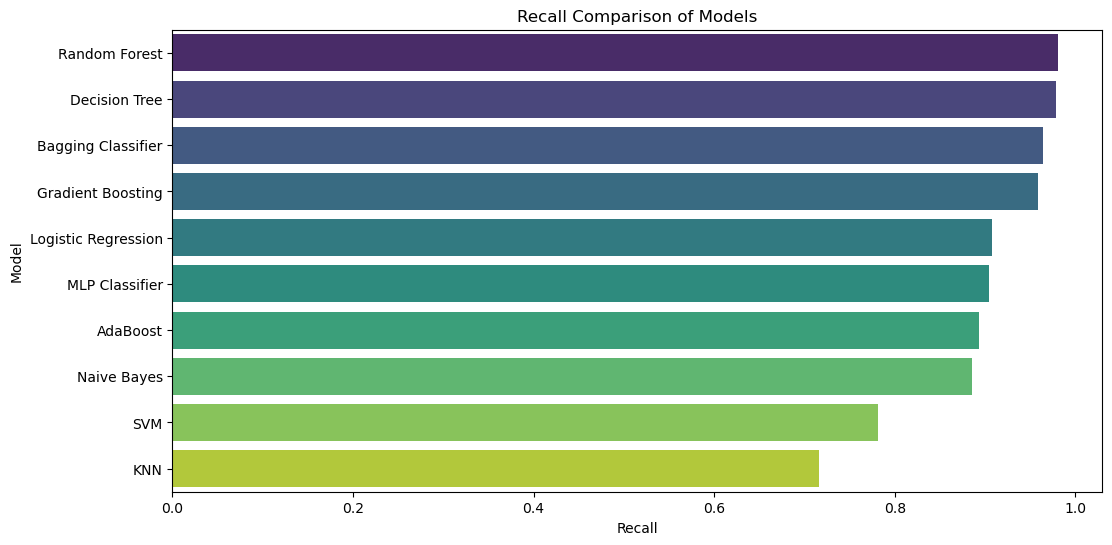

In [74]:
# Plot the model accuarcy results
plt.figure(figsize=(12,6))
sns.barplot(x="Recall", y="Model", data=results_df, palette="viridis")
plt.title("Recall Comparison of Models")
plt.show()

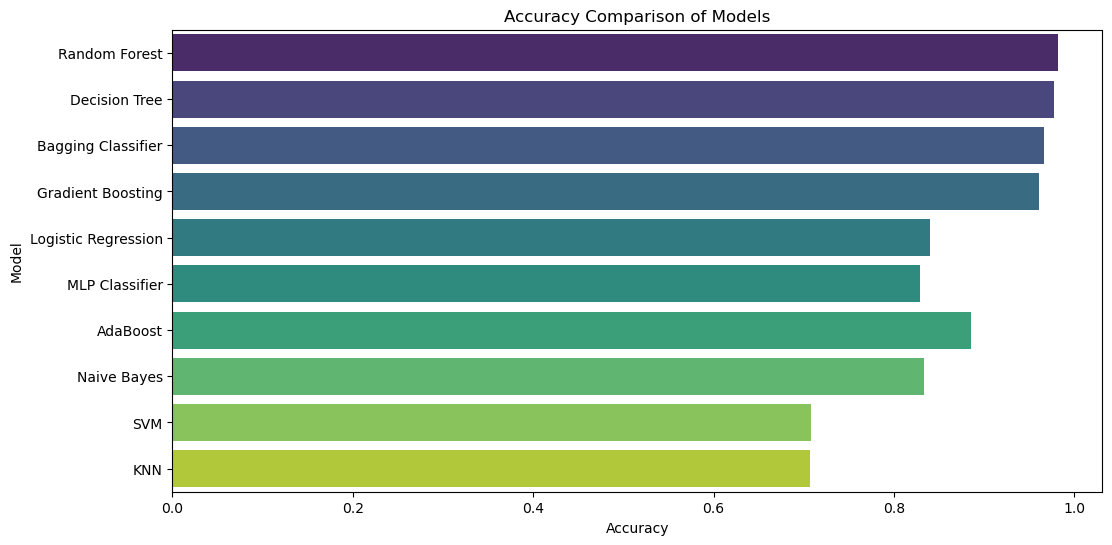

In [75]:
# Plot the model accuarcy results
plt.figure(figsize=(12,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

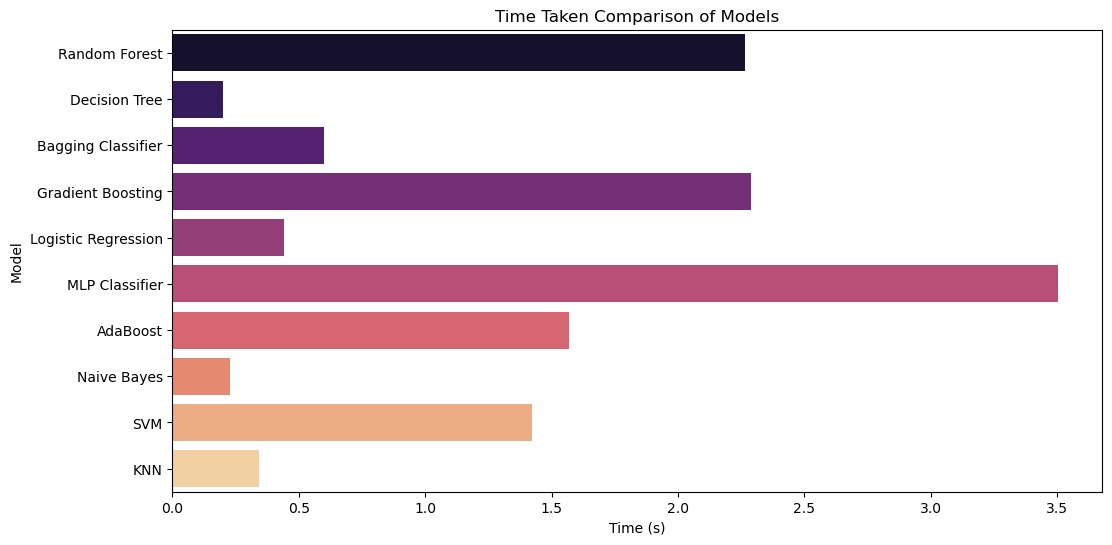

In [76]:
# Plot the time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Time Taken Comparison of Models")
plt.show()

### Exporting the Model for use with the Streamlit Application

In [77]:
import joblib

# Train Random Forest on the full dataset
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save the model
joblib.dump(best_model, "random_forest_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [78]:
X_train.columns

Index(['Age', 'Sex', 'CheastPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'NumMajorVessels', 'Thal'],
      dtype='object')